In [24]:
import matplotlib.pyplot as plt
import metapack as mp
import pandas as pd

In [2]:
pkg = mp.jupyter.open_package()
pkg

In [3]:
#df = pkg.resource('lcd-san').dataframe()

In [36]:
dfx = pkg.resource('lcd-san').read_csv()
dfx['datetime'] = pd.to_datetime(dfx.date)
dfx['date'] = pd.to_datetime(dfx['datetime'].dt.date)

In [5]:
dfx.dtypes

station                               object
station_name                          object
elevation                            float64
latitude                             float64
longitude                            float64
date                                  object
reporttpye                            object
hourlyskyconditions                   object
hourlyvisibility                     float64
hourlyprsentweathertype               object
hourlydrybulbtempf                   float64
hourlydrybulbtempc                   float64
hourlywetbulbtempf                   float64
hourlywetbulbtempc                   float64
hourlydewpointtempf                  float64
hourlydewpointtempc                  float64
hourlyrelativehumidity               float64
hourlywindspeed                      float64
hourlywinddirection                   object
hourlywindgustspeed                  float64
hourlystationpressure                float64
hourlypressuretendency               float64
hourlypres

In [6]:
dfx.head().T

,0,1,2,3,4
station,WBAN:23188,WBAN:23188,WBAN:23188,WBAN:23188,WBAN:23188
station_name,SAN DIEGO INTERNATIONAL AIRPORT CA US,SAN DIEGO INTERNATIONAL AIRPORT CA US,SAN DIEGO INTERNATIONAL AIRPORT CA US,SAN DIEGO INTERNATIONAL AIRPORT CA US,SAN DIEGO INTERNATIONAL AIRPORT CA US
elevation,4.6,4.6,4.6,4.6,4.6
latitude,32.7336,32.7336,32.7336,32.7336,32.7336
longitude,-117.183,-117.183,-117.183,-117.183,-117.183
date,2008-08-01 00:51:00,2008-08-01 01:51:00,2008-08-01 02:51:00,2008-08-01 03:51:00,2008-08-01 04:00:00
reporttpye,FM-15,FM-15,FM-15,FM-15,FM-12
hourlyskyconditions,OVC:08 15,OVC:08 15,OVC:08 13,OVC:08 13,NaN
hourlyvisibility,9,9,9,9,8.7
hourlyprsentweathertype,NaN,NaN,NaN,NaN,NaN


In [7]:
[c for c in dfx.columns if 'precip' in c ]

['hourlyprecip',
 'dailyprecip',
 'monthlydeptfromnormalprecip',
 'monthlytotalliquidprecip',
 'monthlygreatestprecip',
 'monthlygreatestprecipdate',
 'monthlydayswithgt001precip',
 'monthlydayswithgt010precip']

In [8]:
[c for c in dfx.columns if 'temp' in c ]

['hourlydrybulbtempf',
 'hourlydrybulbtempc',
 'hourlywetbulbtempf',
 'hourlywetbulbtempc',
 'hourlydewpointtempf',
 'hourlydewpointtempc',
 'dailymaximumdrybulbtemp',
 'dailyminimumdrybulbtemp',
 'dailyaveragedrybulbtemp',
 'dailydeptfromnormalaveragetemp',
 'dailyaveragedewpointtemp',
 'dailyaveragewetbulbtemp',
 'monthlymaximumtemp',
 'monthlyminimumtemp',
 'monthlymeantemp',
 'monthlydewpointtemp',
 'monthlywetbulbtemp',
 'monthlydeptfromnormalmaximumtemp',
 'monthlydeptfromnormalminimumtemp',
 'monthlydeptfromnormalaveragetemp',
 'monthlydayswithgt90temp',
 'monthlydayswithlt32temp',
 'monthlydayswithgt32temp',
 'monthlydayswithlt0temp']

In [9]:
dfx.dailyprecip.isnull().value_counts()

True     118603
False      4084
Name: dailyprecip, dtype: int64

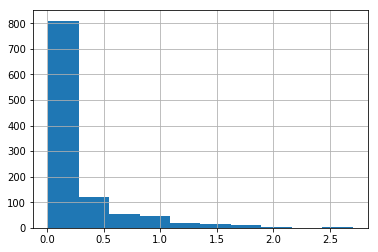

In [10]:
dfx[dfx.dailyprecip > 0].dailyprecip.hist(bins=10)

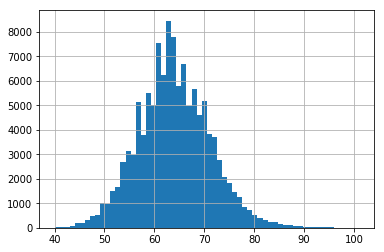

In [11]:
dfx.hourlydrybulbtempf.hist(bins=60)

From ftp://ftp.ncdc.noaa.gov/pub/data/gcos/readme.txt:

* FM-15 METAR Aviation routine weather report
* FM-16 SPECI Aviation selected special weather report
* SOD ?
* SY-MT  Synoptic and METAR merged report

METVAR reports are issued hourly, while SPECI report are reported for exception wether conditions. 


In [14]:
dfx.reporttpye.value_counts()

FM-15    87016
FM-16    17764
FM-12    14243
SOD       3626
SY-MT       38
Name: reporttpye, dtype: int64

In [17]:
sum(dfx.dailyprecip.isnull())

118603

In [48]:
precip = dfx[['date', 'dailyprecip']]
x = precip[precip.dailyprecip > 0 ].groupby('date').first().reset_index()
x.groupby(x.date.dt.year).sum()

,dailyprecip
date,
2008,6.84
2009,8.29
2010,19.53
2011,15.94
2012,9.48
2013,9.01
2014,10.24
2015,15.84
2016,10.88
